In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import warnings
import pandas as pd 
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#df['Traded Value'] = df['Traded Value'].apply(lambda x: '{:.2f}'.format(x))

In [3]:
import numpy as np
import pandas as pd
import sklearn.metrics as sk 
import matplotlib.pyplot as plt 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import sklearn.metrics

In [4]:
#train_filename = "c:/aa mtas/AA_ER/ml/python-code/loan prediction/train.csv"
train_filename = "c:/aa mtas/AA_ER/ml/python-code/A1Practice/loan-prediction-train.csv"
test_filename = "c:/aa mtas/AA_ER/ml/python-code/loan prediction/test.csv"

In [5]:
train_orig = pd.read_csv(train_filename)
test_orig = pd.read_csv(test_filename)

In [6]:
train_orig.shape

(614, 13)

In [7]:
train = train_orig.copy()
test = test_orig.copy()

In [8]:
train.shape, test.shape

((614, 13), (367, 12))

In [9]:
train.columns, test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [10]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000,614.000,592.000,600.000,564.000
mean,5403.459,1621.246,146.412,342.000,0.842
std,6109.042,2926.248,85.587,65.120,0.365
min,150.000,0.000,9.000,12.000,0.000
25%,2877.500,0.000,100.000,360.000,1.000
50%,3812.500,1188.500,128.000,360.000,1.000
75%,5795.000,2297.250,168.000,360.000,1.000
max,81000.000,41667.000,700.000,480.000,1.000


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000,nan,360.000,1.000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000,128.000,360.000,1.000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000,66.000,360.000,1.000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000,120.000,360.000,1.000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000,141.000,360.000,1.000,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000,267.000,360.000,1.000,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000,95.000,360.000,1.000,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000,158.000,360.000,0.000,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000,168.000,360.000,1.000,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000,349.000,360.000,1.000,Semiurban,N


In [14]:
train.dropna(subset=['LoanAmount'],inplace=True)
train.shape

(592, 13)

In [15]:
pd.crosstab(train['Gender'],train['Loan_Status']) 

Loan_Status,N,Y
Gender,,
Female,36,73
Male,140,330


In [16]:
pd.crosstab(train['Married'],train['Loan_Status']) 

Loan_Status,N,Y
Married,,
No,75,131
Yes,106,278


In [17]:
pd.crosstab(train['Education'],train['Loan_Status'])

Loan_Status,N,Y
Education,,
Graduate,134,331
Not Graduate,47,80


In [18]:
train['Married'].value_counts()


Yes    384
No     206
Name: Married, dtype: int64

In [19]:
train['Loan_Status'].value_counts()

Y    411
N    181
Name: Loan_Status, dtype: int64

In [20]:
train['Loan_Status'].value_counts(normalize=True)

Y   0.694
N   0.306
Name: Loan_Status, dtype: float64

<AxesSubplot:>

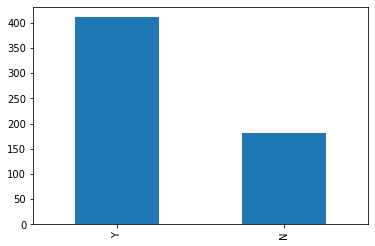

In [21]:
train['Loan_Status'].value_counts().plot.bar()

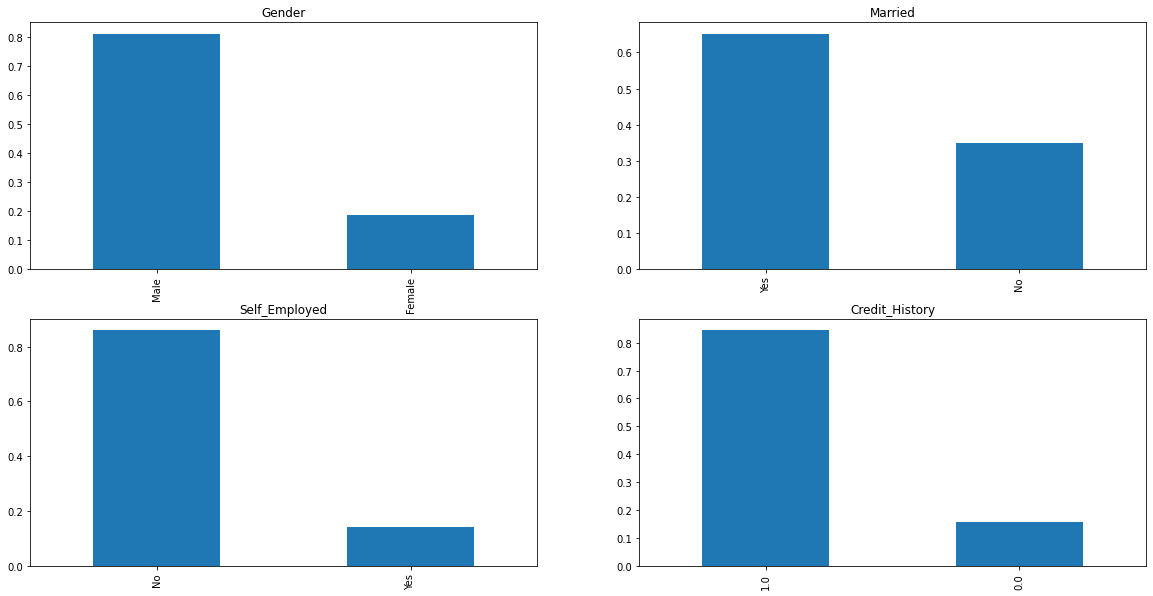

In [22]:
plt.figure(1)
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222) 
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

<AxesSubplot:title={'center':'Education'}>

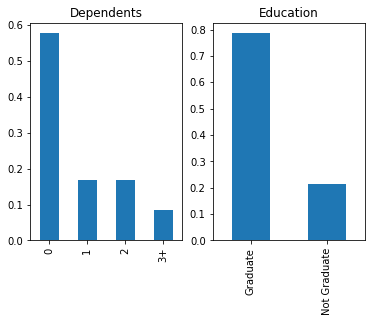

In [23]:
plt.figure(1)
plt.subplot(121) 
train['Dependents'].value_counts(normalize=True).plot.bar(  title= 'Dependents') 
plt.subplot(122) 
train['Education'].value_counts(normalize=True).plot.bar(  title= 'Education') 

In [24]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               2
Dependents           13
Education             0
Self_Employed        31
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)


In [26]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)



In [27]:
train['Loan_Amount_Term'].value_counts()

360.000    493
180.000     42
480.000     15
300.000     13
84.000       4
240.000      3
120.000      3
36.000       2
60.000       2
12.000       1
Name: Loan_Amount_Term, dtype: int64

In [28]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [29]:
train.isnull().sum(), test.isna().sum()

(Loan_ID              0
 Gender               0
 Married              0
 Dependents           0
 Education            0
 Self_Employed        0
 ApplicantIncome      0
 CoapplicantIncome    0
 LoanAmount           0
 Loan_Amount_Term     0
 Credit_History       0
 Property_Area        0
 Loan_Status          0
 dtype: int64,
 Loan_ID              0
 Gender               0
 Married              0
 Dependents           0
 Education            0
 Self_Employed        0
 ApplicantIncome      0
 CoapplicantIncome    0
 LoanAmount           0
 Loan_Amount_Term     0
 Credit_History       0
 Property_Area        0
 dtype: int64)

In [30]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)

In [31]:
y = train.Loan_Status
x = train.drop('Loan_Status',axis=1) 

In [32]:
x=pd.get_dummies(x) 
test=pd.get_dummies(test)

In [33]:
x.shape,test.shape

((592, 20), (367, 20))

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3)

In [35]:
x_train.shape, x_test.shape  

((414, 20), (178, 20))

In [36]:
model = LogisticRegression() 
model.fit(x_train, y_train)

LogisticRegression()

In [37]:
y_test_pred = model.predict(x_test)

In [38]:
accuracy_score(y_test,y_test_pred)

0.7584269662921348

In [39]:
test_pred = model.predict(test)

In [40]:
test_pred[1:5]

array(['Y', 'Y', 'Y', 'Y'], dtype=object)

In [41]:
test_orig.Loan_ID

0      LP001015
1      LP001022
2      LP001031
3      LP001035
4      LP001051
         ...   
362    LP002971
363    LP002975
364    LP002980
365    LP002986
366    LP002989
Name: Loan_ID, Length: 367, dtype: object

In [42]:
submit = pd.DataFrame()
submit["Loan_ID"] = test_orig.Loan_ID
submit["Loan_Status"] = test_pred
submit.set_index("Loan_ID")

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y
...,...
LP002971,Y
LP002975,Y
LP002980,Y


In [43]:
submit.to_csv("c:/aa mtas/AA_ER/ml/python-code/loan prediction/result-linear.csv")

# cross validation for better score

In [44]:
from sklearn.model_selection import StratifiedKFold

In [45]:
i=1 
kf = StratifiedKFold(n_splits=3,random_state=1,shuffle=True)
kf

StratifiedKFold(n_splits=3, random_state=1, shuffle=True)

In [46]:
models = pd.DataFrame()
i=0
for train_index,test_index in kf.split(x,y):
        print('\n{} of kfold {}'.format(i,kf.n_splits))
        xtrn,xtst = x.loc[train_index],x.loc[test_index]  
        ytrn,ytst = y[train_index],y[test_index]
       
        xtrn.dropna(axis =0, how="any",inplace = True)
        ytrn.dropna(axis =0, how="any",inplace = True)
        xtst.dropna(axis=0,how="any",inplace  = True)
        ytst.dropna(axis=0,how="any",inplace=True)
#        print(xtrn.isna().sum(), ytrn.isna().sum(), xtst.isna().sum(), ytst.isna().sum()) 
        model = LogisticRegression(random_state=1)  
        model.fit(xtrn, ytrn)    
        pred_test = model.predict(xtst)     
        score = accuracy_score(ytst,pred_test) 
        print('accuracy_score',score)     
        #print('score',metrics.r2_score(ytst,pred_test))     
        i = i+1
       



0 of kfold 3
accuracy_score 0.7731958762886598

1 of kfold 3
accuracy_score 0.8279569892473119

2 of kfold 3
accuracy_score 0.806282722513089


In [47]:
pred_test = model.predict(xtst)     

In [48]:
score = accuracy_score(ytst,pred_test)    

test_pred = model.predict(test)

pred_ytst=model.predict(xtst)
score, xtst.shape, ytst.shape

(0.806282722513089, (191, 20), (191,))

In [49]:
ytst.replace('N',0,inplace=True)
ytst.replace('Y',1,inplace=True)
ytst.head()

1     0
4     1
5     1
11    1
12    1
Name: Loan_Status, dtype: int64

In [50]:
from sklearn import metrics 
#fpr, tpr, thresholds  = metrics.roc_curve(ytst,  pred_ytst)
#auc = metrics.roc_auc_score(ytst, pred_ytst)
#auc,fpr, tpr,len(fpr)

In [51]:
submit["Loan_ID"] = test_orig.Loan_ID
submit["Loan_Status"] = test_pred
submit.set_index("Loan_ID")
submit.to_csv("c:/aa mtas/AA_ER/ml/python-code/loan prediction/result-kfold.csv")

In [52]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, x_train, y_train, cv=kf, scoring='accuracy')
    print(name,cv_results)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR [0.82608696 0.79710145 0.82608696]
LR: 0.816425 (0.013664)
LDA [0.8115942  0.78985507 0.81884058]
LDA: 0.806763 (0.012316)
KNN [0.58695652 0.63043478 0.63043478]
KNN: 0.615942 (0.020496)
CART [0.67391304 0.65942029 0.65942029]
CART: 0.664251 (0.006832)
NB [0.8115942  0.7826087  0.79710145]
NB: 0.797101 (0.011833)
SVM [0.68115942 0.68115942 0.68115942]
SVM: 0.681159 (0.000000)


In [53]:
accu = [] 
for name, model in models:
    pred =  cross_val_predict(model, x_test, y_test, cv=2)
    score = accuracy_score(y_test,pred)
    accu.append(score)
    names.append(name)
    msg = "%s: %f " % (name, score)
    print(msg)

LR: 0.786517 
LDA: 0.825843 
KNN: 0.696629 
CART: 0.679775 
NB: 0.679775 
SVM: 0.724719 


In [54]:
#fold = StratifiedKFold(n_splits=2,random_state=1,shuffle=True)
model = LogisticRegression ()
model.fit(x_train,y_train)
cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    

array([0.74698795, 0.81927711, 0.79518072, 0.77108434, 0.79268293])

In [55]:
y_test_pred= cross_val_predict(model, x_test, y_test, cv=3)

In [56]:
metrics.accuracy_score (y_test, y_test_pred)

0.7808988764044944

In [57]:
y_test_pred

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N'], dtype=objec

In [63]:
y_test_pred_bin=np.where(y_test_pred=="N", 0, 1) 


In [67]:
y_test_bin=np.where(y_test=="N", 0, 1) 


In [69]:
metrics.r2_score(y_test_bin, y_test_pred_bin)

-0.09824394874228748

In [70]:
test_pred = model.predict(test)
submit["Loan_ID"] = test_orig.Loan_ID
submit["Loan_Status"] = test_pred
#submit.set_index("Loan_ID")
submit.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [71]:
submit.set_index("Loan_ID",inplace=True)
submit.head()

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y


In [72]:
submit.to_csv("c:/aa mtas/AA_ER/ml/python-code/loan prediction/result-crossval.csv")

In [73]:
submit.head()

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y


In [74]:
x['Total_Income']=x['ApplicantIncome']+x['CoapplicantIncome'] 
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

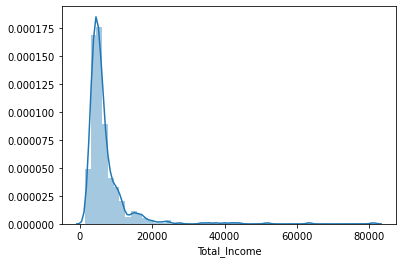

In [75]:
sns.distplot(x['Total_Income']);

In [76]:
x['Total_Income_log'] = np.log(x['Total_Income']) 

<AxesSubplot:xlabel='Total_Income_log'>

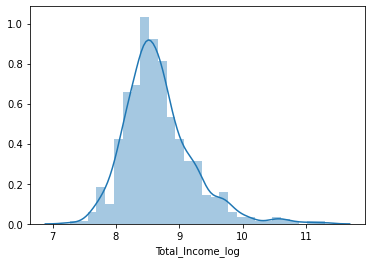

In [77]:
sns.distplot(x['Total_Income_log'])

In [78]:
test['Total_Income_log'] = np.log(test['Total_Income'])

<AxesSubplot:xlabel='Total_Income_log'>

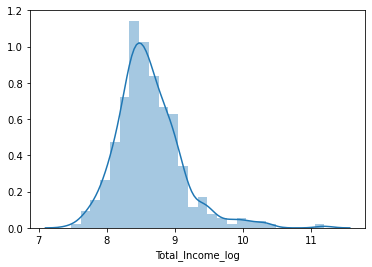

In [79]:
sns.distplot(test['Total_Income_log'] )

In [80]:
x['EMI']=x['LoanAmount']/x['Loan_Amount_Term']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term']

In [81]:
x.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income', 'Total_Income_log', 'EMI'],
      dtype='object')

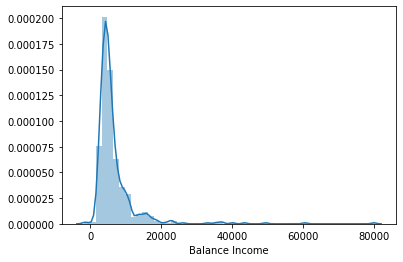

In [82]:
x['Balance Income']=x['Total_Income']-(x['EMI']*1000)
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
sns.distplot(x['Balance Income']);

In [83]:
x=x.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test=test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3)
x_train.shape

(414, 20)

In [85]:
# model = LogisticRegression ()
#model = DecisionTreeClassifier(random_state=1) 
model = RandomForestClassifier(n_estimators=500, max_depth=5)
#model = XGBClassifier(n_estimators=50, max_depth=3)     

model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=500)

In [86]:
kf = StratifiedKFold(n_splits=3,random_state=1,shuffle=True)
cross_val_score(model, x_train, y_train,cv=kf,  scoring='accuracy')
    

array([0.81884058, 0.82608696, 0.79710145])

In [87]:
y_test_pred= cross_val_predict(model, x_test, y_test, cv=3)
metrics.accuracy_score (y_test, y_test_pred)

0.7865168539325843

In [88]:
test_pred = model.predict(test)

In [89]:
#test_pred = model.predict(test)
submit = pd.DataFrame()
submit["Loan_ID"] = test_orig.Loan_ID
submit["Loan_Status"] = test_pred
submit.set_index("Loan_ID",inplace= True)
submit.head()

,Loan_Status
Loan_ID,
LP001015,Y
LP001022,Y
LP001031,Y
LP001035,Y
LP001051,Y


In [90]:
submit.to_csv("c:/aa mtas/AA_ER/ml/python-code/loan prediction/result-randomforst.csv")

In [ ]:
# running Random forest and tree 

In [ ]:
train = train_orig.copy()
test = test_orig.copy()

In [ ]:
train.isna().sum()

In [ ]:
train.shape, test.shape, train.columns

In [ ]:
#used from above after dummy variable created 

In [ ]:
train.shape, test.shape, x_train.shape , x_test.shape, y_train.shape,y_test.shape

In [ ]:
x_test.info()

In [ ]:
x_test.head()

In [ ]:
model_rfr = RandomForestClassifier(n_estimators = 400,random_state=123,max_features="sqrt",max_depth=50,min_samples_leaf=5, oob_score = True)


In [ ]:
model_rfr.fit(x_train,y_train)

In [ ]:
y_test_pred = model_rfr.predict(x_test)

In [ ]:
accuracy_score (y_test, y_test_pred)

In [ ]:
test_pred = model_rfr.predict(test)

In [ ]:
len(x_test.columns), len(test.columns)

In [ ]:
submit = pd.DataFrame()
submit["Loan_ID"] = test_orig.Loan_ID
submit["Loan_Status"] = test_pred
submit.set_index("Loan_ID",inplace= True)
submit.head()

In [ ]:
submit.to_csv("c:/aa mtas/AA_ER/ml/python-code/loan prediction/result-rfr1.csv")

In [ ]:
test.head()

# Random forest 

In [ ]:
# after keep important features only

In [ ]:
model_rfr = RandomForestClassifier(n_estimators = 400,criterion = "entropy", random_state=123,max_depth=50,min_samples_leaf=5, oob_score = True)
model_rfr.fit(x_train,y_train)
importances = list(model_rfr.feature_importances_)
importances

In [ ]:
feature_list = list(x_train.columns)

In [ ]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

In [ ]:
feature_importances

In [ ]:
('Credit_History', 0.44),
 ('ApplicantIncome', 0.12),
 ('LoanAmount', 0.12),
 ('CoapplicantIncome', 0.09),
 ('Married_Yes', 0.03),
 ('Married_No', 0.02),
 ('Property_Area_Rural', 0.02),
 ('Property_Area_Semiurban', 0.02),
 ('Loan_Amount_Term', 0.01),
 ('Gender_Female', 0.01),
 ('Gender_Male', 0.01),
 ('Dependents_0', 0.01),
 ('Dependents_1', 0.01),
 ('Dependents_2', 0.01),
 ('Dependents_3+', 0.01),
 ('Education_Graduate', 0.01),
 ('Education_Not Graduate', 0.01),
 ('Self_Employed_No', 0.01),
 ('Self_Employed_Yes', 0.01),
 ('Property_Area_Urban', 0.01)]

In [ ]:
sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [ ]:
important_indices = [feature_list.index('Credit_History'), feature_list.index('ApplicantIncome'),feature_list.index('LoanAmount')\
,feature_list.index('CoapplicantIncome'), feature_list.index('Property_Area_Rural'),feature_list.index('Property_Area_Semiurban')]

In [ ]:
important_indices

# XGBOOST

In [ ]:
x_train_imp = x_train.iloc[:,important_indices]

#x_train_imp.columns = ("Credit_History","ApplicantIncome" ,"LoanAmount","CoapplicantIncome","Married_Yes","Married_No")
x_train_imp.columns = ("Credit_History","ApplicantIncome" ,"LoanAmount","CoapplicantIncome","Property_Area_Rural","Property_Area_Semiurban")

In [ ]:
x_test_imp = x_test.iloc[:,important_indices]
#x_test_imp.columns = ("Credit_History","ApplicantIncome" ,"LoanAmount","CoapplicantIncome","Married_Yes","Married_No")
x_test_imp.columns = ("Credit_History","ApplicantIncome" ,"LoanAmount","CoapplicantIncome","Property_Area_Rural","Property_Area_Semiurban")

In [ ]:
test_imp = test.iloc[:,important_indices]
#test_imp.columns = ("Credit_History","ApplicantIncome" ,"LoanAmount","CoapplicantIncome","Married_Yes","Married_No")
test_imp.columns = ("Credit_History","ApplicantIncome" ,"LoanAmount","CoapplicantIncome","Property_Area_Rural","Property_Area_Semiurban")

In [ ]:
x_train_imp.head(), x_train_imp.columns, 

In [ ]:
x_train.head()

In [ ]:

#model_rfr_f = GradientBoostingClassifier(n_estimators=100,max_depth=5)
#model_rfr_f = RandomForestClassifier(n_estimators = 400,criterion = "entropy", random_state=123,max_depth=50,min_samples_leaf=5, oob_score = True)
model_rfr_f = XGBClassifier (n_estimators=100,max_depth=5)
model_rfr_f

In [ ]:
model_rfr_f.fit(x_train_imp,y_train)

In [ ]:
y_test_pred = model_rfr_f.predict(x_test_imp)

In [ ]:
accuracy_score(y_test,y_test_pred)

In [ ]:
test_pred = model_rfr_f.predict(test_imp)

In [ ]:
submit = pd.DataFrame()
submit["Loan_ID"] = test_orig.Loan_ID
submit["Loan_Status"] = test_pred
submit.set_index("Loan_ID",inplace= True)
submit.head()

In [ ]:
submit.to_csv("c:/aa mtas/AA_ER/ml/python-code/loan prediction/result-gb.csv")